## Given f(n) that generates random integer 1 <= i <= n uniformly, can we design g(m) that generates random integer 1 <= j <= m by only using f(n), where 1 <= m < n^2?

In [2]:
import random

# 1. Implements f(n), straightforward.
def f(n: int) -> int:
    return random.randint(1, n)

# 2. Let's design g(m).
# If we call f(n) twice, all possible outcomes form a matrix:
# 11 12 ... 1n
# 21 22 ... 2n
# ...
# n1 n2 ... nn
# where "ij" denotes that we get "i" and then "j". Since each "ij" comes out with the same chance, we may simply return
# its "index" in the matrix which is n * (i - 1) + j, if that value is less than m. However, when m is just slightly 
# larger than n we may end up calling f(n) multiple times since the prob(m / (n*n)) can be small.
# We can use mod operation to get a result in [0, m) no matter how large "index" is by index % m, but we also need to 
# ensure that the mod yields a uniform distribution, which can be achieved by capping "index" at (n**2 // m) * m.
def g(m: int, n: int) -> int:
    # This upper bound ensures that the mod operation yields uniform distribution later.
    ubound = ((n ** 2) // m) * m
    while True:
        idx = n * (f(n) - 1) + f(n)
        if idx <= ubound:
            break
    return idx % m + 1

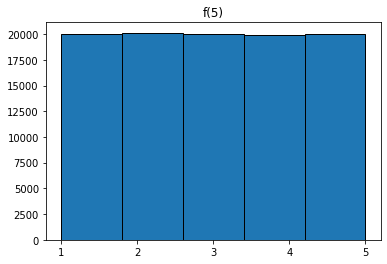

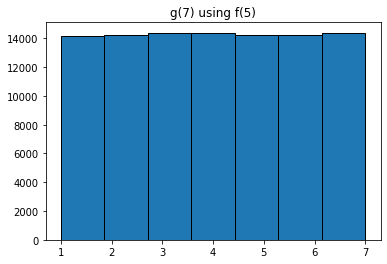

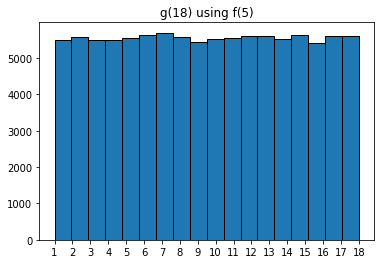

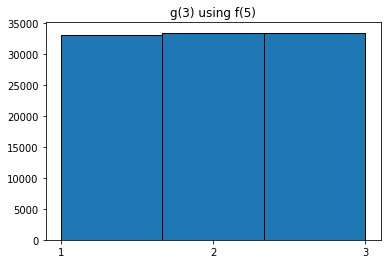

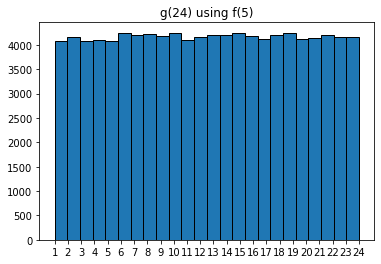

In [15]:
import matplotlib.pyplot as plt

NUM_SAMPLES = 100000

n = 5
x = [f(n) for _ in range(NUM_SAMPLES)]
plt.title('f({})'.format(n))
plt.xticks(range(1, n + 1))
plt.hist(x, bins=n, edgecolor='k')
plt.show()

for m in [7, 18, 3, 24]:
    x = [g(m, n) for _ in range(NUM_SAMPLES)]
    plt.title('g({}) using f({})'.format(m, n))
    plt.xticks(range(1, m + 1))
    plt.hist(x, bins=m, edgecolor='k')
    plt.show()